# Problem Statement:

Yulu, India's foremost micro-mobility service provider, is experiencing significant declines in its revenues. To address this concern, Yulu has engaged a consulting company to investigate the underlying factors affecting the demand for their shared electric cycles in the Indian market. To identify significant variables that predict the demand for shared electric cycles in the Indian market and understand their impact on cycle demand.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [55]:
df.shape

(10886, 12)

In [56]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## There are no missing values in the dataset

In [57]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [58]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## Unique attributes for each attribute

In [61]:
print(df.apply(lambda x : x.unique()))

datetime      [2011-01-01T00:00:00.000000000, 2011-01-01T01:...
season                                             [1, 2, 3, 4]
holiday                                                  [0, 1]
workingday                                               [0, 1]
weather                                            [1, 2, 3, 4]
temp          [9.84, 9.02, 8.2, 13.12, 15.58, 14.76, 17.22, ...
atemp         [14.395, 13.635, 12.88, 17.425, 19.695, 16.665...
humidity      [81, 80, 75, 86, 76, 77, 72, 82, 88, 87, 94, 1...
windspeed     [0.0, 6.0032, 16.9979, 19.0012, 19.9995, 12.99...
casual        [3, 8, 5, 0, 2, 1, 12, 26, 29, 47, 35, 40, 41,...
registered    [13, 32, 27, 10, 1, 0, 2, 7, 6, 24, 30, 55, 47...
count         [16, 40, 32, 13, 1, 2, 3, 8, 14, 36, 56, 84, 9...
dtype: object


## Univariate Analysis

### Plotting box plots to detect outliers in the data

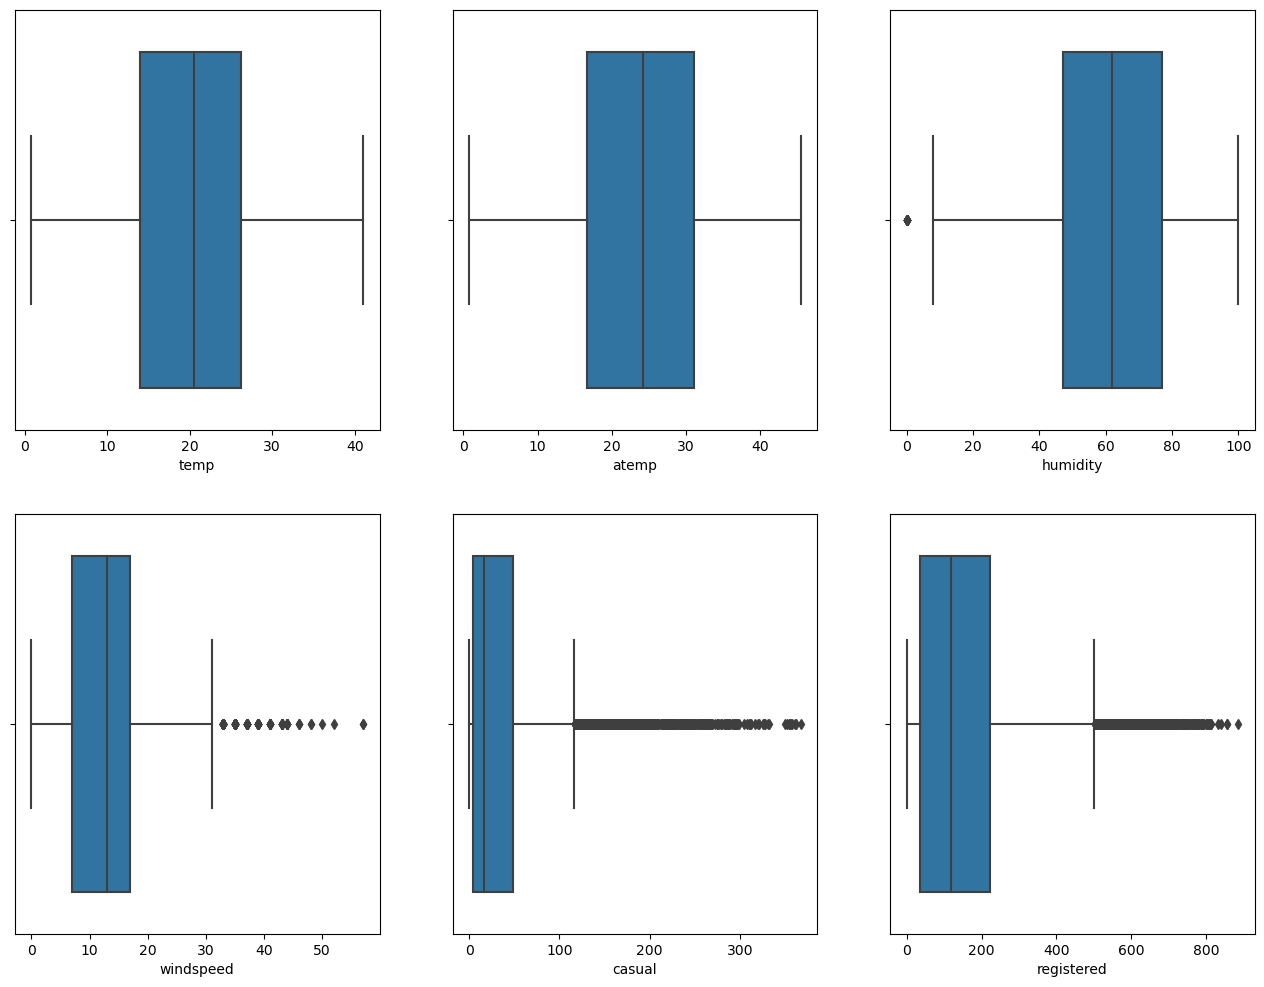

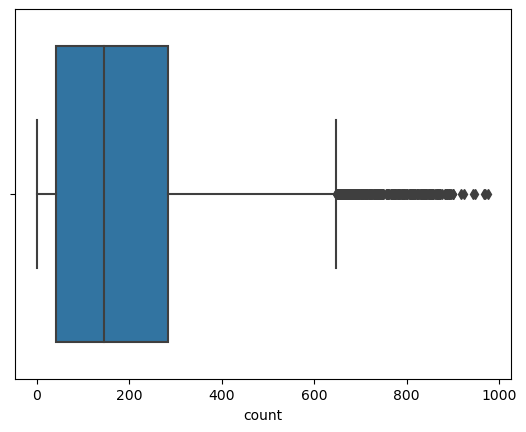

In [62]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=df[num_cols[-1]]) 
plt.show()

**HUMIDITY CASUAL COUNT & REGISTRED have outliers**

### Let's plot distribution plots for all continuous variables and barplots/countplots for all categorical variables in the Yulu dataset

###  Univariate analysis - Distribution plots for Continuous variables

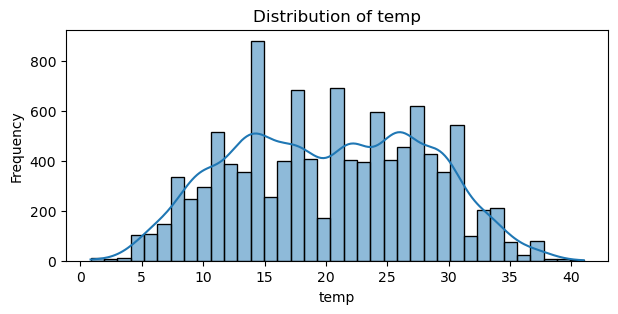

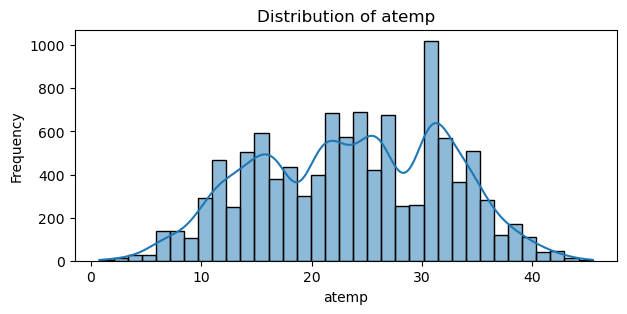

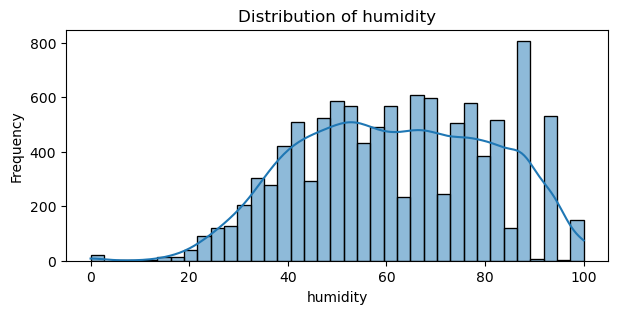

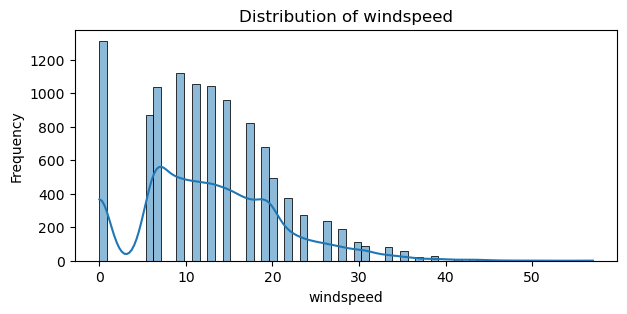

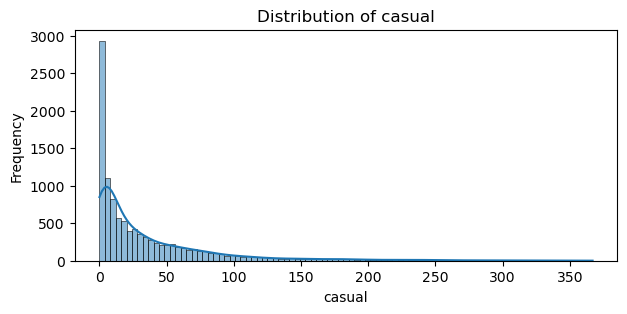

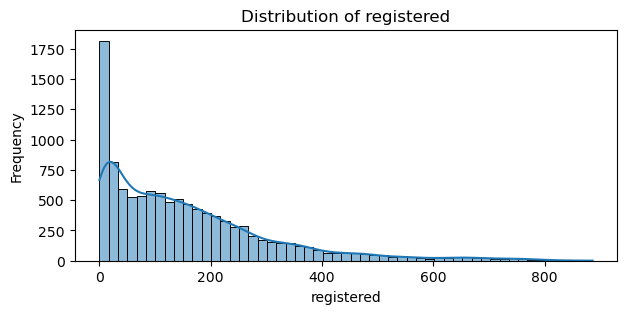

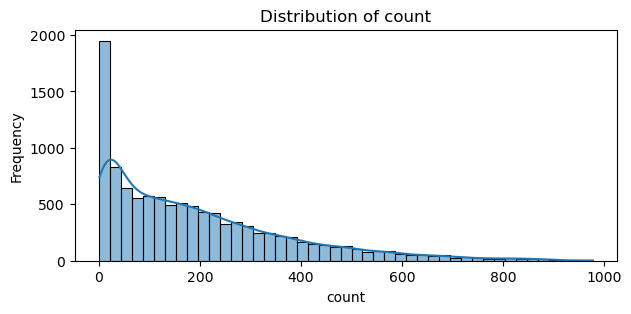

In [63]:
continous_var = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count' ]

for var in continous_var:
    plt.figure(figsize=(7,3))
    sns.histplot(df[var], kde='True')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

###  Univariate analysis - Distribution plots for Categorical variables

### Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
For bivariate analysis, we'll examine the relationships between important variables such as workday and count, season and count, and weather and count. We can use scatter plots or box plots to visualize these relationships. 

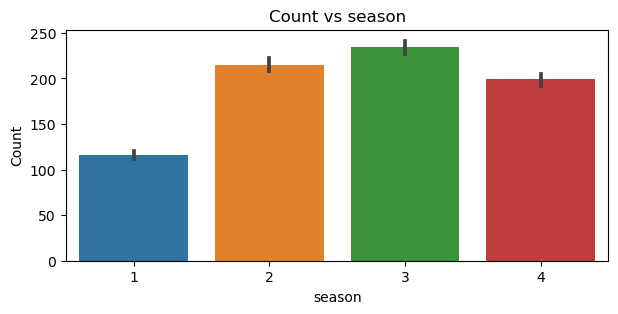

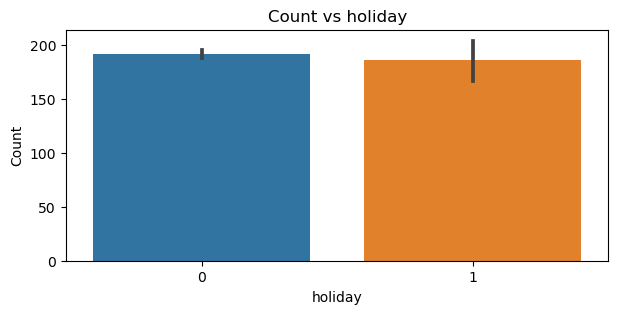

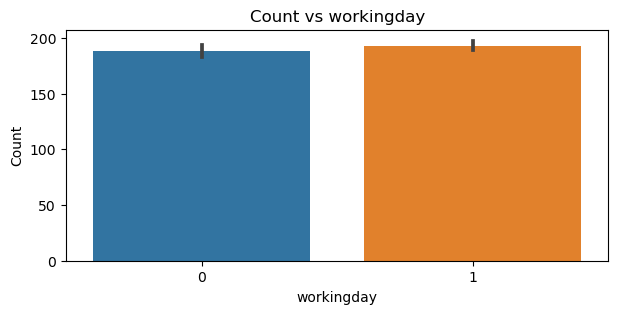

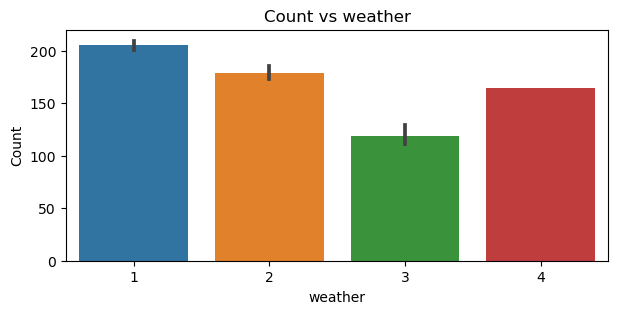

In [64]:
categorical_var = ['season', 'holiday', 'workingday', 'weather']

for var in categorical_var:
    plt.figure(figsize=(7,3))
    sns.barplot(x=df[var], y=df['count'], data=df)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Count vs {var}')
    plt.show()
              

### Insights

**1** Summer and fall has the highest number of users as compared to spring and winter which is natural as the windspeed is high during these seasons and people tend to avoid two wheelers during this time of the year.

**2** The bike rental demand was fairly consistent throughout the week(working day & non working day)

**3** The bike rental demand was fairly consistent throughout the holiday and non holiday.

**4** Clear(1) and Cloudy(2) has the highest number of users whereas Light rain(3 has the lowest number of users. Suprisingly during heavy rain there are higher bike demands which could be contributed from the fact that people want to reach their destination early and there are surge in other paltforms. 

### Recommendations

To keep the users engaged in winter and spring season, YULU can provide -
1. Seasonal Discounts and Promotions
2. Targeted Marketing Campaigns
3. Weather Adaptive Pricing
4. Introduce Electric Vehicles for Colder Months

When it comes to weather, Yulu can expand their reach so that people don't have to worry about disposability and availability of bikes.


### Calculate the correlation matrix

/var/folders/bc/byp79cv56b53hq4lpz78hyvh0000gn/T/ipykernel_94741/1437749088.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


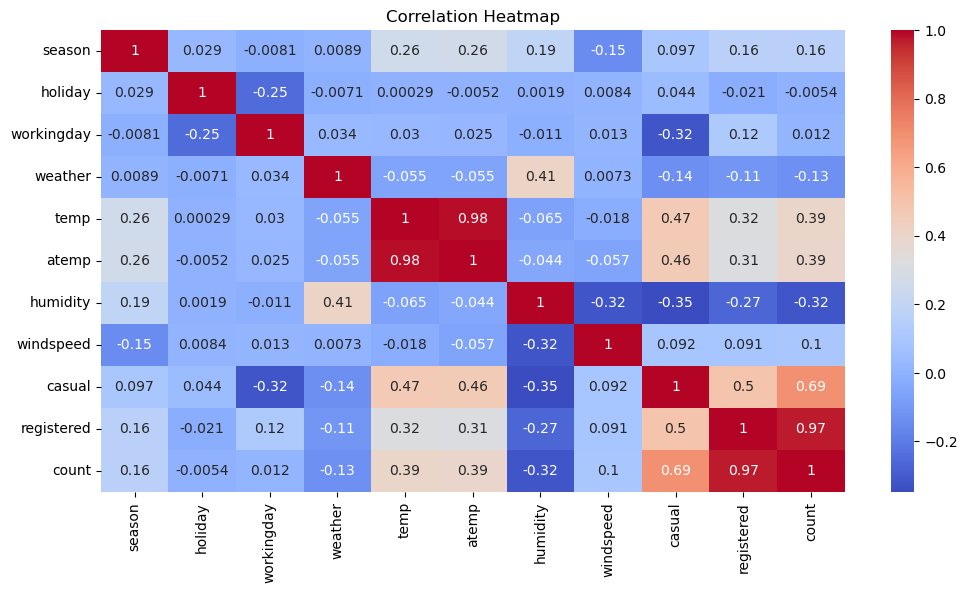

In [65]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', )
plt.title('Correlation Heatmap')
plt.show()


### Interpretation of the correlation matrix
temp and atemp: These two variables have a very high positive correlation of approximately 0.98, indicating a strong linear relationship. This is expected since "temp" and "atemp" are both measures of temperature, and it's natural for them to be highly correlated.

humidity and windspeed: These variables have weak correlations with other variables. "humidity" has a weak negative correlation with "temp" and "atemp", which makes sense as higher temperatures usually correlate with lower humidity. "windspeed" also has weak correlations with other variables.

casual, registered, and count: These variables show positive correlations with each other. It's expected that "casual" and "registered" users would be positively correlated with the total count of bike rentals ("count").

count and other variables: The total count of bike rentals ("count") shows moderate positive correlations with "temp" and "atemp", indicating that higher temperatures may be associated with higher bike rental counts. It also shows a weaker positive correlation with "casual" and "registered" users, which suggests that both types of users contribute to the overall demand for bike rentals.

## Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

## Hypothesis Testing 1
**Null Hypothesis (H0):** There is no significant difference in the average number of bike rides between weekdays and weekends.

**Alternate Hypothesis (H1):** There is a significant difference in the average number of bike rides between weekdays and weekends.

We'll use a **2-sample independent t-test** because we want to compare the means of two independent groups (weekdays and weekends) to determine if they are significantly different.

**We'll set the significance level (alpha) to 0.05 (5%)**

In [66]:
from scipy import stats
# Split the data into weekdays and weekends
weekdays_data = df[df['workingday'] == 1]['count']
weekends_data = df[df['workingday'] == 0]['count']

# Perform 2-sample independent t-test
t_statistic, p_value = stats.ttest_ind(weekdays_data, weekends_data)

alpha = 0.05

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Draw conclusions
if p_value <= alpha:
    print("Reject Null Hypothesis: There is a significant difference in the number of bike rides between weekdays and weekends.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the number of bike rides between weekdays and weekends.")

t-statistic: 1.2096277376026694
p-value: 0.22644804226361348
Fail to Reject Null Hypothesis: There is no significant difference in the number of bike rides between weekdays and weekends.


### Results
Based on the 2-sample independent t-test performed with a significance level of 0.05 (alpha = 5%), the following conclusions can be drawn:

t-statistic: 1.2096
p-value: 0.2264

The calculated t-statistic was 1.21, which is smaller than the critical t-value. Additionally, the p-value was approximately 0.226, which is greater than the significance level. This indicates that there is no statistically significant difference in the average number of bike rides between weekdays and weekends. Therefore, we fail to reject the null hypothesis, suggesting that the observed differences in the average bike ride counts are likely due to random variation rather than a meaningful difference between the two groups.

**Inferences and Recommendations:**

The demand for bike rides remains relatively consistent throughout the week, regardless of whether it's a weekday or weekend. Yulu may continue to offer their bike rental services with a consistent approach across weekdays and weekends.

## Check if the demand of bicycles on rent is the same for different Weather conditions?

## Hypothesis Testing 2

**Null Hypothesis (H0):** The mean demand for bicycles on rent is the same across all weather conditions.

**Alternate Hypothesis (H1):** At least one of the weather conditions has a different mean demand for bicycles on rent.

We'll use a **one-way ANOVA test** because we have one categorical independent variable (weather conditions) with more than two levels and one continuous dependent variable (demand for bicycles).

**We'll set the significance level (alpha) to 0.05 (5%)**

In [67]:
from scipy.stats import f_oneway
# Extract demand data for different weather conditions
weather_1 = df[df['weather'] == 1]['count']
weather_2 = df[df['weather'] == 2]['count']
weather_3 = df[df['weather'] == 3]['count']
weather_4 = df[df['weather'] == 4]['count']

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)

alpha = 0.05

print(f"One-way ANOVA Test - F-statistic: {f_statistic}, p-value: {p_value}", '\n')

if p_value <= alpha:
    print("Reject Null Hypothesis: There are significant differences in the mean demand across different weather conditions.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the mean demand across different weather conditions.")


One-way ANOVA Test - F-statistic: 65.53024112793271, p-value: 5.482069475935669e-42 

Reject Null Hypothesis: There are significant differences in the mean demand across different weather conditions.


### Results
We conclude that there are significant differences in the mean demand for bicycles on rent across different weather conditions. This suggests that weather conditions have a significant impact on the demand for bicycles, indicating that people's preferences or behaviors regarding bicycle rentals may vary depending on the weather conditions.

## Check if the demand of bicycles on rent is the same for different Seasons?

## Hypothesis Testing 3

**Null Hypothesis (H0):** The mean demand for bicycles on rent is the same across all seasons.

**Alternate Hypothesis (H1):** At least one of the seasons has a different mean demand for bicycles on rent.

We'll use a **one-way ANOVA test** because we have one categorical independent variable (weather conditions) with more than two levels and one continuous dependent variable (demand for bicycles).

**We'll set the significance level (alpha) to 0.05 (5%)**

In [68]:
from scipy.stats import f_oneway
# Extract demand data for different season conditions
season_1 = df[df['season'] == 1]['count']
season_2 = df[df['season'] == 2]['count']
season_3 = df[df['season'] == 3]['count']
season_4 = df[df['season'] == 4]['count']

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(season_1, season_2, season_3, season_4)

alpha = 0.05

print(f"One-way ANOVA Test - F-statistic: {f_statistic}, p-value: {p_value}", '\n')

if p_value <= alpha:
    print("Reject Null Hypothesis: There are significant differences in the mean demand across different seasons.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the mean demand across different seasons.")


One-way ANOVA Test - F-statistic: 236.94671081032106, p-value: 6.164843386499654e-149 

Reject Null Hypothesis: There are significant differences in the mean demand across different seasons.


### Results

We conclude that there are significant differences in the mean demand for bicycles on rent across different seasons. This suggests that seasons have a significant impact on the demand for bicycles, indicating that people's preferences or behaviors regarding bicycle rentals vary across different seasons.

## Check if the Weather conditions are significantly different during different Seasons?

## Hypothesis Testing 4
**Null Hypothesis (H0):** There is no significant association between weather conditions and seasons

**Alternate Hypothesis (H1):** There is a significant association between weather conditions and seasons.

We'll use the **chi-square test** to determine if there is a significant association between weather conditions and seasons.

**We'll set the significance level (alpha) to 0.05 (5%)**

In [69]:
from scipy.stats import chi2_contingency
# Encode the categorical variables (Weather and Season)
encoded_data = df[['weather', 'season']]

# Perform chi-square test of independence
chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(encoded_data['weather'], encoded_data['season']))

alpha = 0.05

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value <= alpha:
    print("Reject Null Hypothesis: There is a significant association between weather conditions and seasons.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant association between weather conditions and seasons.")


Chi-square Statistic: 49.15865559689363
P-value: 1.5499250736864862e-07
Reject Null Hypothesis: There is a significant association between weather conditions and seasons.


### Results
we conclude that there is a significant association between weather conditions and seasons. This indicates that weather conditions and seasons are not independent of each other, suggesting that certain weather conditions may be more prevalent during specific seasons.